# SIT307 – Data Mining & Machine Learning
## Group Assignment 2 (Group 7 - Norris, Lindsay & Rousis)

### Exploratory Data Analysis and Results

In [3]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
# Set pandas to display default of 17 rows
pd.set_option('display.max_rows', 17)
#
# import the csv file to a dataframe.
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Cleaning

Before the data can be used, each column will be checked for range errors, missings data and spelling mistakes etc. This dataset is from the public website, Kaggle. It is a popular dataset and, as such, is unlikely to contain errors. Notwithstanding, the data will be cleaned and pre-processed first to confirm it is valid.

An initial observation is that sentence case is used for some category and column names and sometimes lower case is used. This lack of uniformity may lead to confusion and waste time performing further data analysis as the data scientist must remember which case is used where. For this reason, all strings will be converted to lowercase to eliminate any confusion. 

In [4]:
# convert columns to lowercase
df.columns = map(str.lower, df.columns)
df.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,date,time,payment,cogs,gross margin percentage,gross income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Now we change all string values in the columns to lower case.

In [5]:
# first get all the column names to use in a loop
list(df.columns)

['invoice id',
 'branch',
 'city',
 'customer type',
 'gender',
 'product line',
 'unit price',
 'quantity',
 'tax 5%',
 'total',
 'date',
 'time',
 'payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'rating']

In [6]:
cols =  ['branch','city',
         'customer type',
         'gender',
         'product line',
         'payment']


# now create a loop to shift the data in the above columns to lower case
for col in cols:
    df[col]=df[col].str.lower()

df.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,date,time,payment,cogs,gross margin percentage,gross income,rating
0,750-67-8428,a,yangon,member,female,health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,c,naypyitaw,normal,female,electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,a,yangon,normal,male,home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,a,yangon,member,male,health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,a,yangon,normal,male,sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,ewallet,604.17,4.761905,30.2085,5.3


We can now go ahead and check each column for missing values:

In [7]:
print(f'The totals of missing values in each column are:')
df.isna().sum()

The totals of missing values in each column are:


invoice id                 0
branch                     0
city                       0
customer type              0
gender                     0
product line               0
unit price                 0
quantity                   0
tax 5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross margin percentage    0
gross income               0
rating                     0
dtype: int64

We use **`df.hist() `** to print histograms of all numerical values. This allows us to see at a glance if there are any anomalies. Whilst this method would not prove accuracy, it does allow one to see if there are any strange values. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002460CF70BA8>,
      dtype=object)

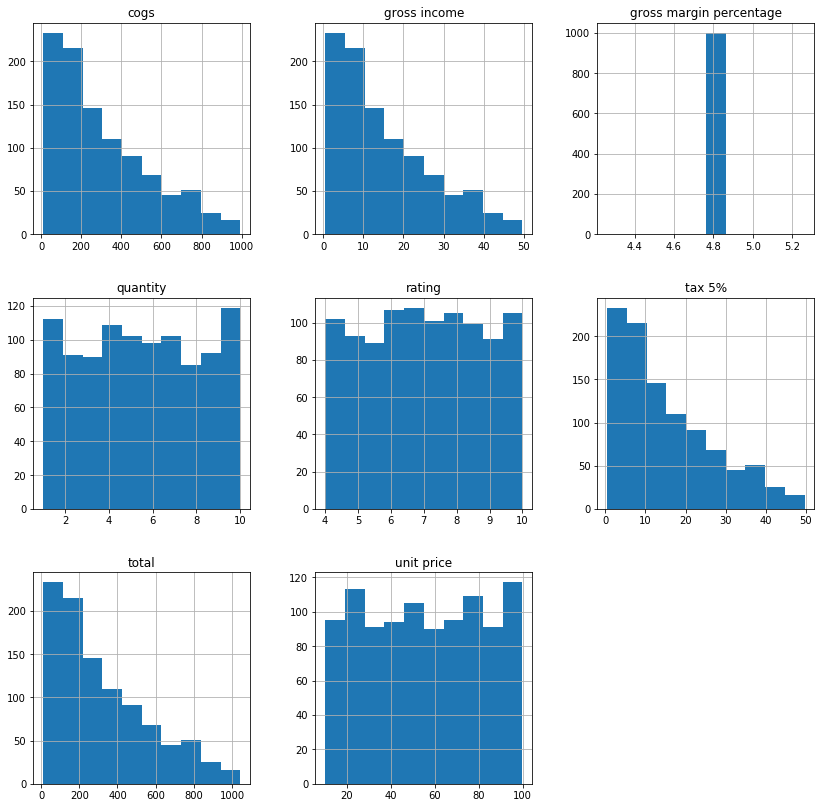

In [8]:
df.hist(figsize = (14, 14))

The above histograms to not reveal anything untoward in the numerical data. The dataset is representative of sales in a convenience store. Therefore it is unlikely that anything here would be sold for large sums of money. The histogram labelled, **cogs** (cost of goods) reveals that no sales took place greater than one thousand dollars. We can also see that there were more than a few numbers of sales at this high end so it is likely that these sales around one thousand dollars did indeed occur. 

The first column of strings, is **`Invoice ID `**. We check to ensure there are as many unique values as there are rows in this dataset.

In [9]:
# check the number of rows and features
print(f"There are {df.shape[0]} rows in this dataset and {df.shape[1]} columns")

print(f"There are {df['invoice id'].nunique()} unique items in this column")

There are 1000 rows in this dataset and 17 columns
There are 1000 unique items in this column


There are 1000 rows. We therefore expect 100 unique values from Invoice ID, and **`.nunique() `** confirms this to be correct.

Likewise, we now check **`Branch `** and **`City `**. There should only be 3 unique values for each of these columns and the counts for each should match exactly.

In [10]:
# confirm 'Branch' and 'City' have only 3 unique values
df['branch'].value_counts()

a    340
b    332
c    328
Name: branch, dtype: int64

In [11]:
df['city'].value_counts()

yangon       340
mandalay     332
naypyitaw    328
Name: city, dtype: int64

Confirm that **`Gender `** has only two values and they are strings:

In [12]:
df['gender'].value_counts()

female    501
male      499
Name: gender, dtype: int64

Check the values of **`Product Line `**:

In [13]:
df['product line'].value_counts()

fashion accessories       178
food and beverages        174
electronic accessories    170
sports and travel         166
home and lifestyle        160
health and beauty         152
Name: product line, dtype: int64

There are no abnormal values in the "Product line" column. There are 6 categories of goods and this confirms what is presented in the data dictionary supplied by the provider of the dataset.

The last column containing strings is the **`Payment`** column. We check the categories of this column:

In [14]:
df['payment'].value_counts()

ewallet        345
cash           344
credit card    311
Name: payment, dtype: int64

Another observation is that the transaction dates represented in the **`date `** column are in an American style date format. This presents the month first, then the day and finally the year. There is also a separate column for the time of day, **`time `** when the transaction took place. This is presented in a 24 hour format but as a string with a colon present in each. It would be far more useful to combine these two columns into a column of **`datetime `** objects that allow for easier data analysis. We will use Pandas **`'to_datetime' `** method to create a new column and this will combine the **`date`** and **`time `** columns to make a new 'datetime' object. The column is labelled **dt** to avoid confusing this column with the **`datetime `** objects themselves.

In [15]:
df['dt']= pd.to_datetime(df['date'] + " " + df['time'])
df[['date', 'time', 'dt']]

,date,time,dt
0,1/5/2019,13:08,2019-01-05 13:08:00
1,3/8/2019,10:29,2019-03-08 10:29:00
2,3/3/2019,13:23,2019-03-03 13:23:00
3,1/27/2019,20:33,2019-01-27 20:33:00
4,2/8/2019,10:37,2019-02-08 10:37:00
5,3/25/2019,18:30,2019-03-25 18:30:00
6,2/25/2019,14:36,2019-02-25 14:36:00
7,2/24/2019,11:38,2019-02-24 11:38:00
...,...,...,...
992,3/10/2019,20:46,2019-03-10 20:46:00


With this new datetime column, we can quickly add a new column specifying the day of the week that each sale took place. For this we use the pandas method, **`dt.dayofweek `**. This returns an integer representing the day of the week where 0 is Monday and 6 is Sunday. We convert this integer to a string using the **`.map `** function.

In [16]:
daysDict = {0:'mon', 1: 'tue', 2: 'wed', 3:'thu', 4: 'fri', 5:'sat', 6:'sun'}
df['day'] = df['dt'].dt.dayofweek.map(daysDict)
print(df['day'].value_counts())
df.head()

sat    164
tue    158
wed    143
fri    139
thu    138
sun    133
mon    125
Name: day, dtype: int64


,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,date,time,payment,cogs,gross margin percentage,gross income,rating,dt,day
0,750-67-8428,a,yangon,member,female,health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,sat
1,226-31-3081,c,naypyitaw,normal,female,electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,fri
2,631-41-3108,a,yangon,normal,male,home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,sun
3,123-19-1176,a,yangon,member,male,health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,sun
4,373-73-7910,a,yangon,normal,male,sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00,fri


With the above information checked and processed for errors, we can establish the main structure of the dataframe and its key variables. Some columns, such as **`invoice id `** do not offer any valuable information. Likewise having two columns that describe the branch (**`branch `** and **`city `**) renders the branch id letter redundant. The **`gross margin percentage `** is a constant and thus offers no value in data exploration. As we now have a **`dt `** column of datetime objects, both **`date `** and **`time `** are now redundant. We strip all of these redundant columns from the dataset.

In [17]:
df.drop(columns=['invoice id', 'branch', 'gross margin percentage', 'date', 'time'], inplace=True, errors='ignore')
df.head()

,city,customer type,gender,product line,unit price,quantity,tax 5%,total,payment,cogs,gross income,rating,dt,day
0,yangon,member,female,health and beauty,74.69,7,26.1415,548.9715,ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00,sat
1,naypyitaw,normal,female,electronic accessories,15.28,5,3.8200,80.2200,cash,76.40,3.8200,9.6,2019-03-08 10:29:00,fri
2,yangon,normal,male,home and lifestyle,46.33,7,16.2155,340.5255,credit card,324.31,16.2155,7.4,2019-03-03 13:23:00,sun
3,yangon,member,male,health and beauty,58.22,8,23.2880,489.0480,ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00,sun
4,yangon,normal,male,sports and travel,86.31,7,30.2085,634.3785,ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00,fri


With key variables remaining, we use a heatmap to test if there are any correclations between pairs of variables. This may reveal interesting interactions or relationships between numerical variables that we can explore in depth during the analysis phase.

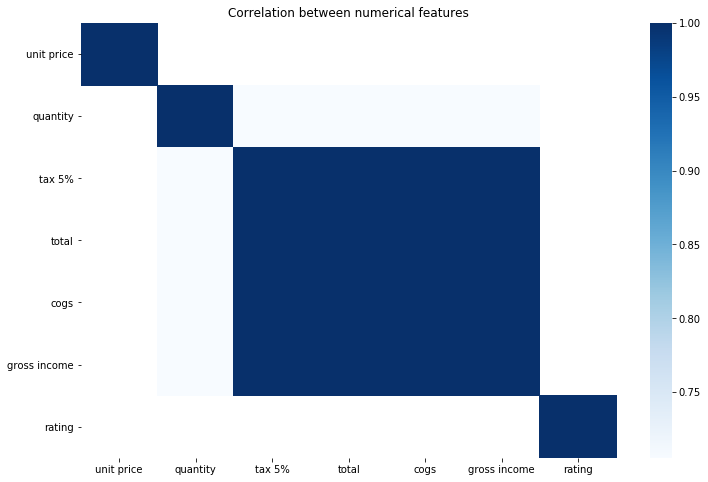

In [18]:
corr = df.corr()
theCorrelation = corr[corr>=.7]
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_title("Correlation between numerical features")
sns.heatmap(theCorrelation, cmap="Blues", ax = ax)
#

plt.show()

Unsuprisingly, there is a strong correlation between monetary totals. For example, as a tax of 5% is added to each value for cost of goods (cogs) it is obvious that this would be a strong correlation. As such, it contributes nothing so "Tax 5%" is dropped from the dataset. 

In [19]:
df.drop(columns=['tax 5%'], inplace=True, errors='ignore')
df.head()

,city,customer type,gender,product line,unit price,quantity,total,payment,cogs,gross income,rating,dt,day
0,yangon,member,female,health and beauty,74.69,7,548.9715,ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00,sat
1,naypyitaw,normal,female,electronic accessories,15.28,5,80.2200,cash,76.40,3.8200,9.6,2019-03-08 10:29:00,fri
2,yangon,normal,male,home and lifestyle,46.33,7,340.5255,credit card,324.31,16.2155,7.4,2019-03-03 13:23:00,sun
3,yangon,member,male,health and beauty,58.22,8,489.0480,ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00,sun
4,yangon,normal,male,sports and travel,86.31,7,634.3785,ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00,fri


***

---

**Which store yielded the highest customer satisfaction?**

It is expected that the store with the **`largest quantity of sales`** has the highest level of satisfaction as it would indicate that people want to purchase from that particular store. It would also be reasonable to assume that the store with the highest amount of sales has the **`largest total spend`**.

In [20]:
# Dict of days in order
week_ordered = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
gender_pal = ["#8f00c7", "#00a6c7"]

# Basic grid set-up. Reduce code repitition
def setup_grid(figx, figy, fontscl):
    sns.set(style="whitegrid")
    sns.set(font_scale=fontscl)
    plt.figure(figsize=(figx, figy))

# Working reference
df.head(3)

,city,customer type,gender,product line,unit price,quantity,total,payment,cogs,gross income,rating,dt,day
0,yangon,member,female,health and beauty,74.69,7,548.9715,ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00,sat
1,naypyitaw,normal,female,electronic accessories,15.28,5,80.2200,cash,76.40,3.8200,9.6,2019-03-08 10:29:00,fri
2,yangon,normal,male,home and lifestyle,46.33,7,340.5255,credit card,324.31,16.2155,7.4,2019-03-03 13:23:00,sun


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Customer Rating by Store')

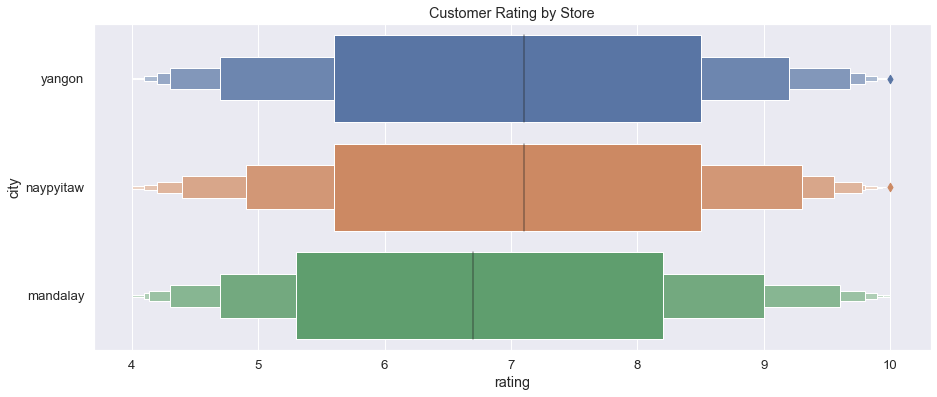

In [21]:
setup_grid(15, 6, 1.2)
sns.boxenplot(y='city', x='rating', data=df).set_title('Customer Rating by Store')

This graph demonstrates that **`Yangon`** has **marginally better** ratings than **`Naypyitaw`** overall with **`Mandalay`** having a significantly lower average in comparison.

Text(0.5, 1.0, 'Daily Rating Breakdown')

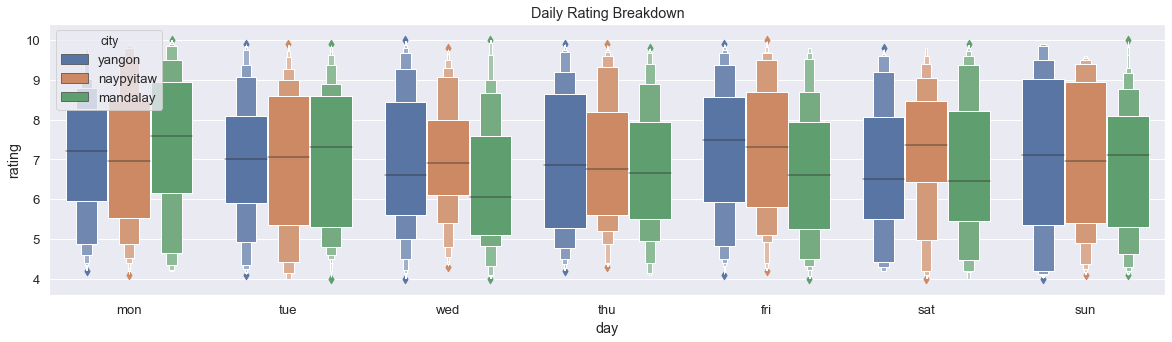

In [22]:
setup_grid(20, 5, 1.2)
sns.boxenplot(x = 'day', y = 'rating', hue='city', data=df, order=week_ordered).set_title('Daily Rating Breakdown')

Day by day breakdown of the ratings each store received as an overall average. Granular reflection of the previous box plot. This graph does not provide much meaningful information to investigate further.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 1.0, 'Average Ratings by Store and Gender')

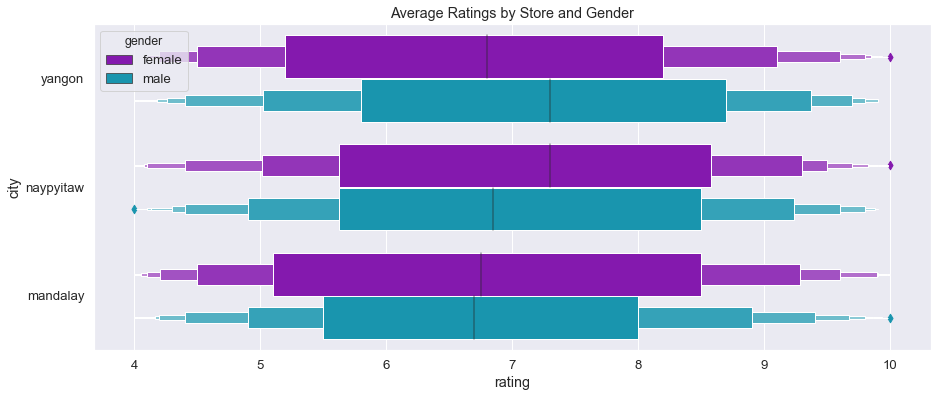

In [23]:
setup_grid(15, 6, 1.2)
sns.boxenplot(y='city', x='rating', hue='gender', data=df, palette=gender_pal).set_title('Average Ratings by Store and Gender')

Females shows a significantly higher rating at the naypyitaw store compared to the other two stores. This makes us ask if there is a correlation between feminine products and the rating given at particular stores.

Men's ratings seem to be fairly similar on average but Yangon show's the highest average for men. What is the product correlation here? Is there one?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 1.0, 'Ratings by Category')

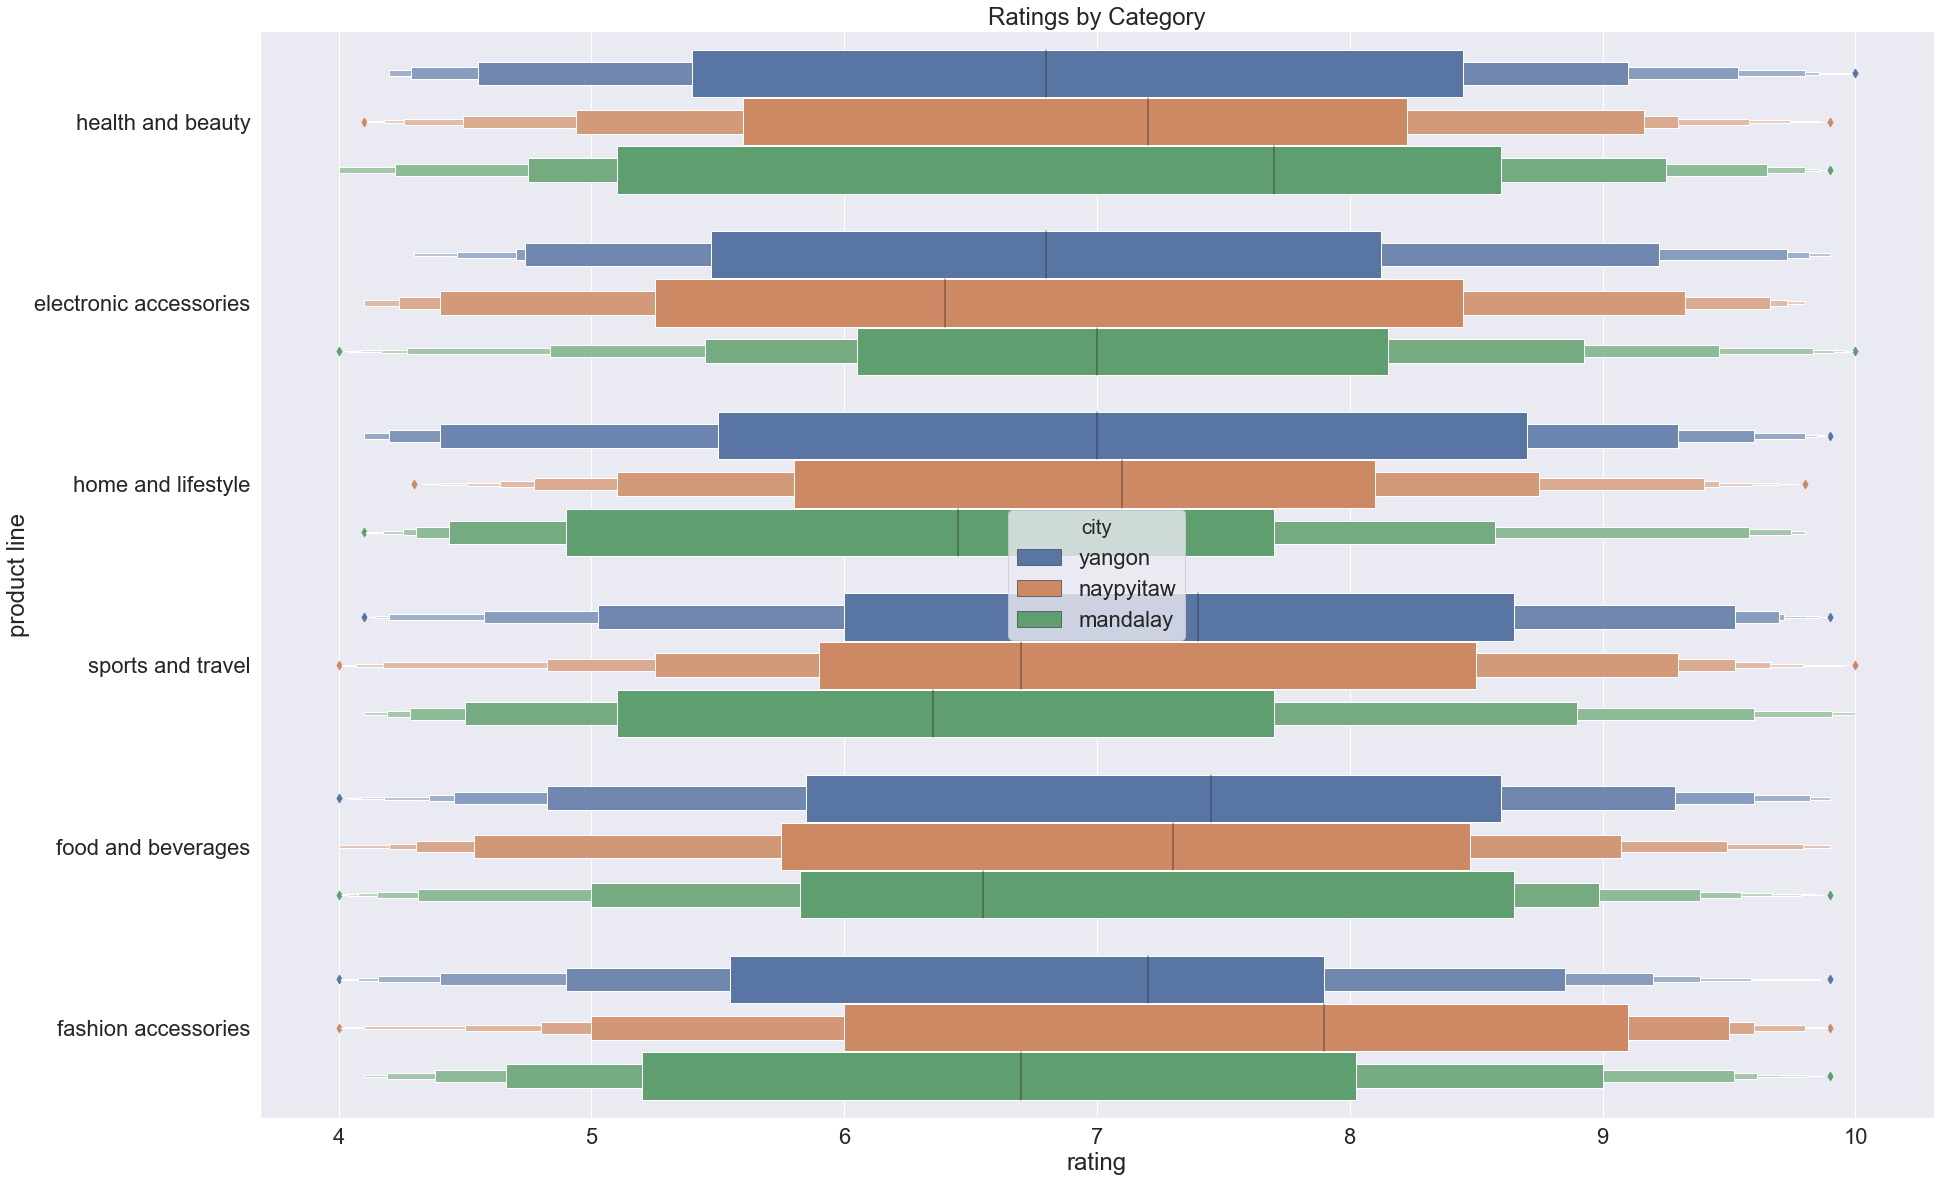

In [24]:
setup_grid(30, 20, 2)
sns.boxenplot(y='product line', x='rating', hue='city', data=df).set_title('Ratings by Category')

The high rating for the Naypyitaw store is explained in this box plot by the extremely high rating for `fashion acessories` for that particular store. Further to this it ranks second for `health and beauty` and first in `home and lifestyle`.

Yangon ranks highest in both `sports and travel` and `food and beverages`. This helps to explain why its the highest rated store among men.

Text(0.5, 1.0, 'Total Quantity of Sales by Store')

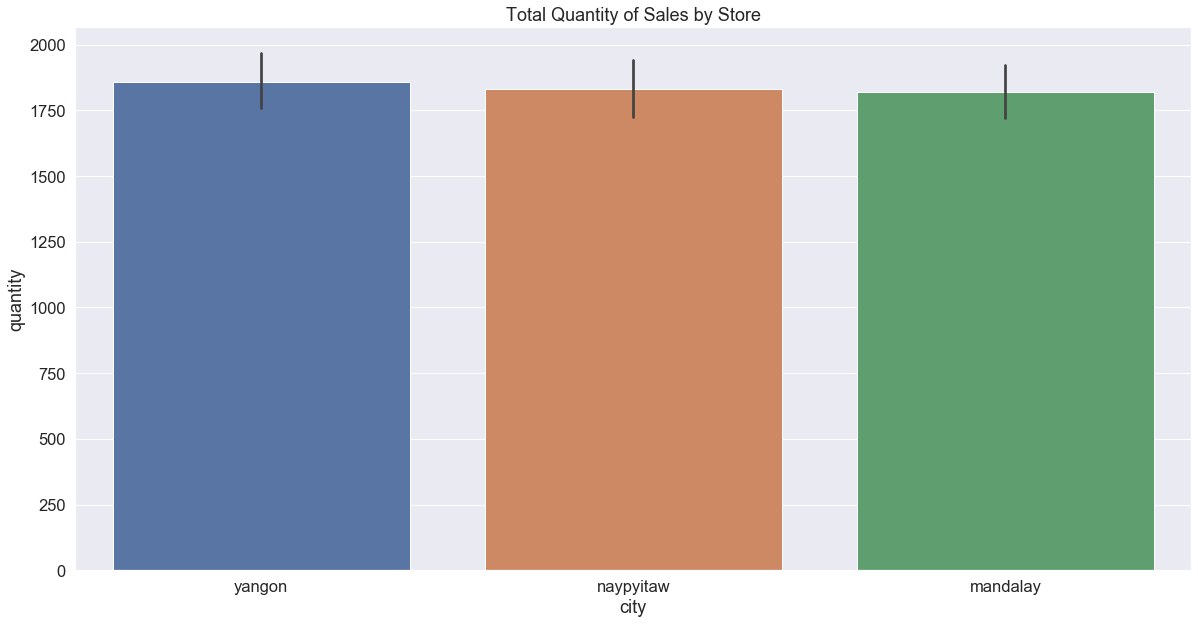

In [25]:
setup_grid(20, 10, 1.5)

sns.barplot(x="city", y='quantity' , data=df, estimator=sum).set_title('Total Quantity of Sales by Store')


Text(0.5, 1.0, 'Total Value of Sales by Store')

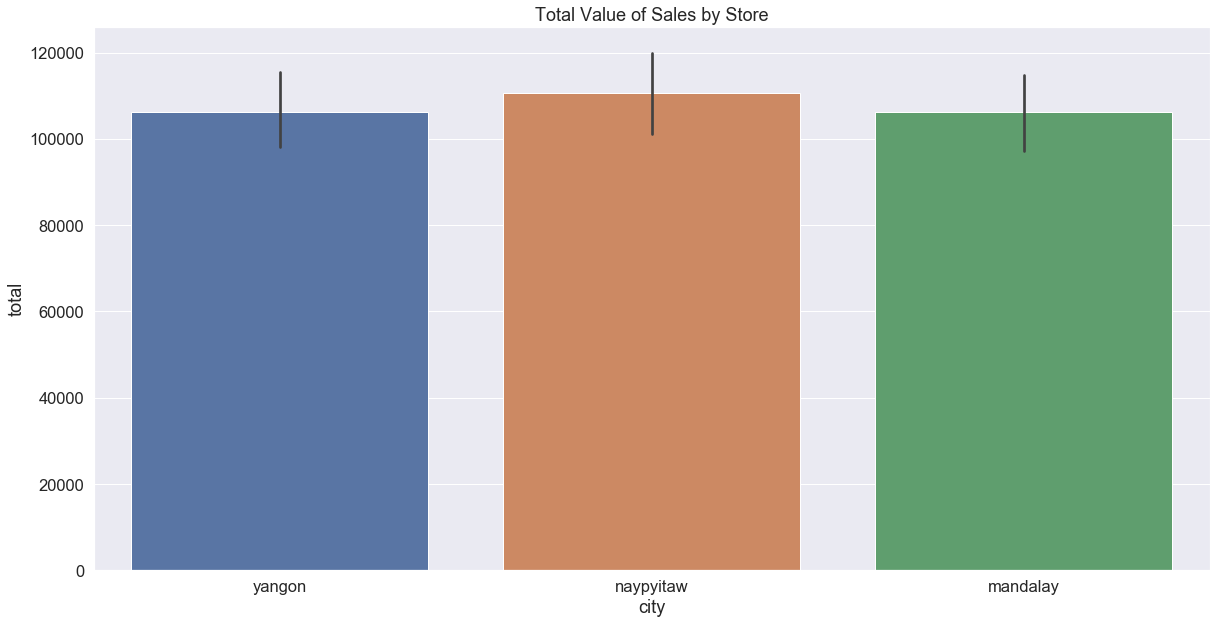

In [26]:
setup_grid(20, 10, 1.5)

sns.barplot(x="city", y='total' , data=df, estimator=sum).set_title('Total Value of Sales by Store')


This graph verifies the hypothesis that the store with the largest quantitity of sales is likely to have the highest rating. This could be for a variety of reasons that the data cannot represent such as store location, size and stock availability/stock on hand. However, what we can extract from the data shown is that the sales quantity reflects the overall ratings of the stores.


_____

___

Following on from the above, this graph details the gender split in sales of each product line. As we can see, women rate health and beauty, food and beverages and fashion accessories higher, whereas men rate electronics, sport and travel and home and lifestyle higher.

Text(0.5, 1.0, 'Average Rating of Product by Gender')

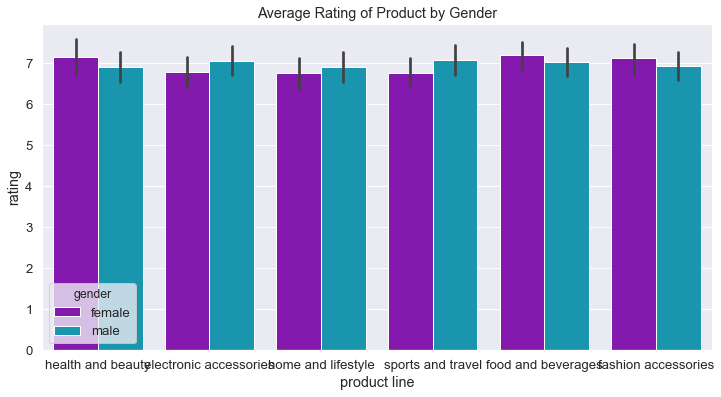

In [27]:
setup_grid(12, 6, 1.2)
sns.barplot(x="product line", y="rating", hue="gender", data=df, palette=gender_pal).set_title("Average Rating of Product by Gender")

This following chart shows the total sales transactions of each product line.

We can see that fashionaccessories has the most total transactions, followed by food and beverages, electronic accessories, sports and travel, home and lifestyle and health and beauty. 

Text(0.5, 1.0, 'Total Purchases by Product Line')

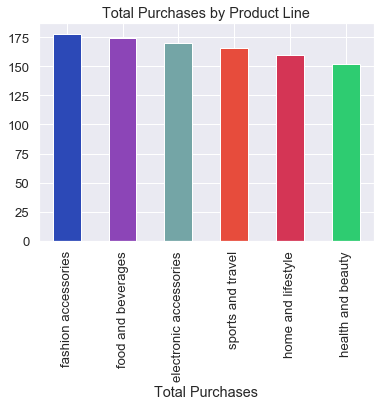

In [28]:
prodCount = df['product line'].value_counts()
prodCount.plot(kind = 'bar', color=["#2c49b7", "#8c45b7", "#74a5a6", "#e74c3c", "#d43555", "#2ecc71"])
plt.xlabel("Total Purchases")
plt.title("Total Purchases by Product Line")

There are some interesting findings in this graph. For example, women rated health and beauty products higher than men but had a significantly lower average cheque. Women ranked 4/6 categories higher than their male counterparts. This indicates that a higher satisfaction rating does not predict higher spending.


Text(0.5, 1.0, 'Total Sales by Product Line')

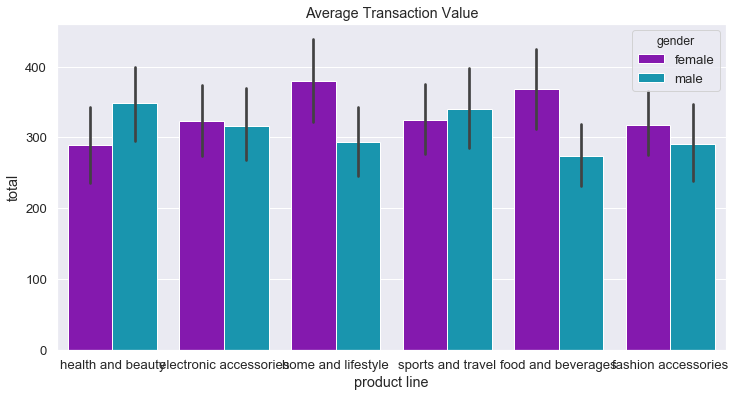

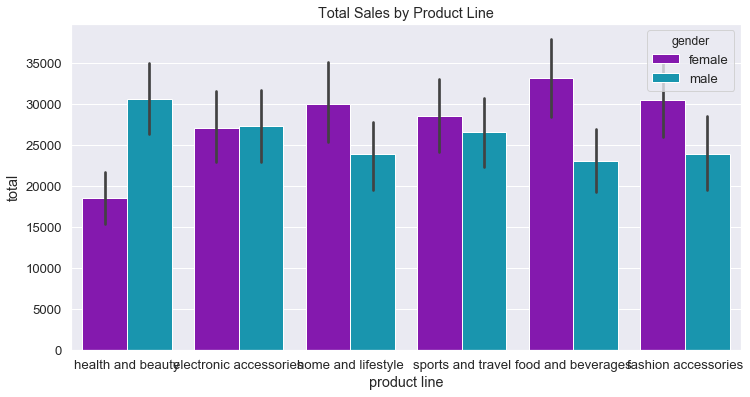

In [29]:
setup_grid(12, 6, 1.2)
sns.barplot(x="product line", y="total", hue="gender", data=df, palette=gender_pal).set_title("Average Transaction Value")

setup_grid(12, 6, 1.2)
sns.barplot(x="product line", y="total", hue="gender", data=df, palette=gender_pal, estimator=sum).set_title("Total Sales by Product Line")

***

The first of these two graphs shows the average total spent per transaction in each product line by store.

The following graph shows the total sales by product line across the three branches. 

interesting findings include the Maypijtaw and Mandalay stores having identical average total for electronic accessories, and less than Yangon, but Naypijtaw has higher gross sales than both of the other locations.

Similar results can be found in fashion accessories


Text(0.5, 1.0, 'Total Sales of Product Line by City')

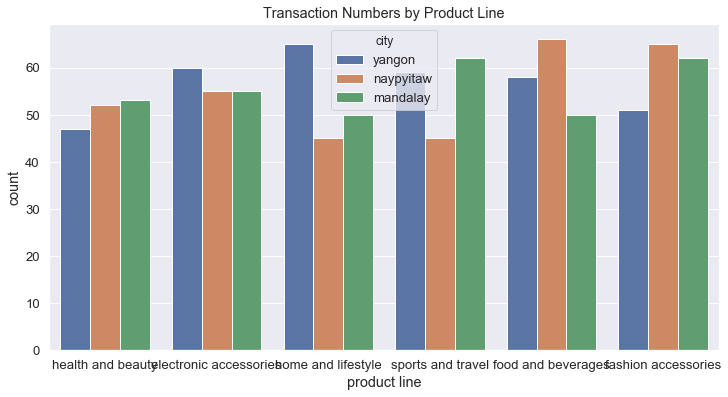

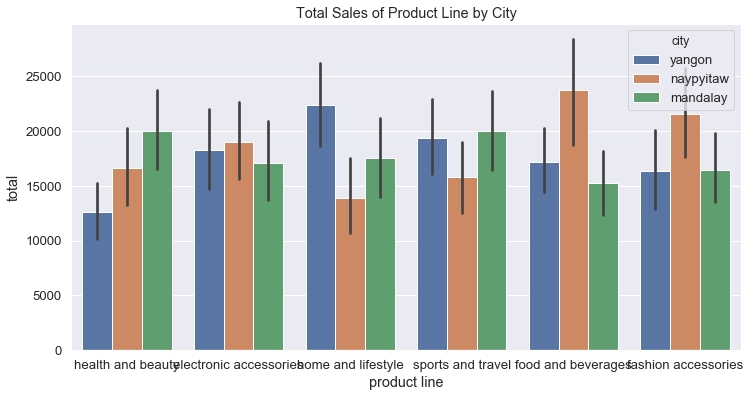

In [30]:
setup_grid(12, 6, 1.2)
sns.countplot(x="product line", hue="city", data=df).set_title("Transaction Numbers by Product Line")

setup_grid(12, 6, 1.2)
sns.barplot(x="product line", y="total", hue="city", data=df, estimator=sum).set_title("Total Sales of Product Line by City")

***

Food and beverages and sport and travel generate the highest value of total sales, with health and beauty gnerating the least. 

The graph below this shows the gender split in transactions by product line. This indicates than men purchase significantly more health and beauty products, women purchase a noticeably higher amount of fashion accessories, sport and travel and food and beverages, and in the remaining two categories the difference is negligible.

Text(0.5, 1.0, 'Total Transactions of each Product by Gender')

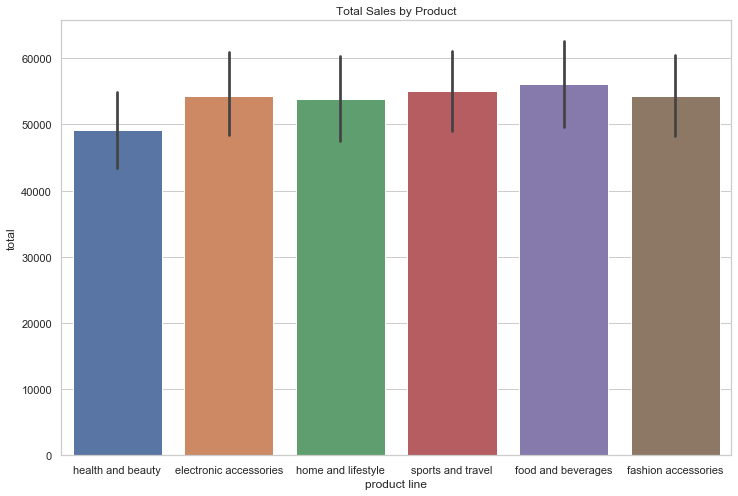

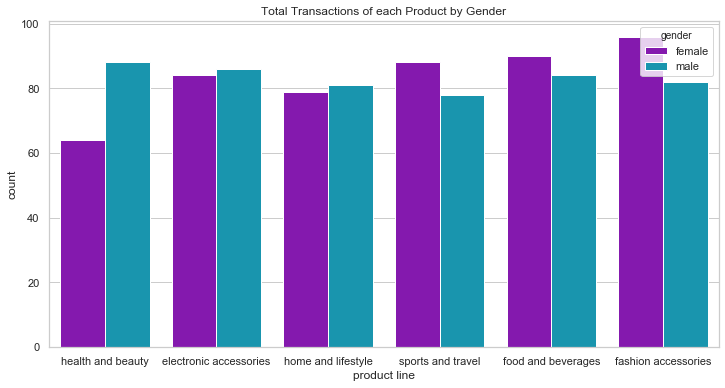

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x="product line", y = "total", data=df, estimator=sum).set_title("Total Sales by Product")

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="product line", hue="gender", data=df, palette=gender_pal).set_title("Total Transactions of each Product by Gender")

End of section here